In [53]:
import pickle
file = pickle.load(open("/home/sagawa/reaction_augmentation/DirectMultiStep/data/processed/all_dataset_nperms=1_nsms=1_val=0.05.pkl", "rb"))
type(file)

tuple

In [54]:
file[0][0], file[1][0], file[2][0], file[3][0]

('O=C(Nc1c[nH]nc1-c1nc2ccccc2[nH]1)c1c(F)cccc1F',
 'O=[N+]([O-])c1c[nH]nc1-c1nc2ccccc2[nH]1',
 "{'smiles':'O=C(Nc1c[nH]nc1-c1nc2ccccc2[nH]1)c1c(F)cccc1F','children':[{'smiles':'Nc1c[nH]nc1-c1nc2ccccc2[nH]1','children':[{'smiles':'O=[N+]([O-])c1c[nH]nc1-c1nc2ccccc2[nH]1'}]},{'smiles':'O=C(O)c1c(F)cccc1F'}]}",
 2)

In [51]:
counter = 0
for i, values in enumerate(zip(*dic.values())):
    print(values)
    counter += 1
    if counter > 10:
        break

('COC(=O)c1cc2c(cc1[N+](=O)[O-])OCCO2', "{'smiles':'COC(=O)c1cc2c(cc1[N+](=O)[O-])OCCO2','children':[{'smiles':'COC(=O)c1ccc2c(c1)OCCO2','children':[{'smiles':'BrCCBr'},{'smiles':'COC(=O)c1ccc(O)c(O)c1'}]},{'smiles':'O=[N+]([O-])O'}]}", 2)
('CNC(=O)CCC(=O)c1ccc(OCC(O)CNC(C)C)cc1', "{'smiles':'CNC(=O)CCC(=O)c1ccc(OCC(O)CNC(C)C)cc1','children':[{'smiles':'CC(C)N'},{'smiles':'CNC(=O)CCC(=O)c1ccc(OCC2CO2)cc1','children':[{'smiles':'CNC(=O)CCC(=O)c1ccc(O)cc1'},{'smiles':'ClCC1CO1'}]}]}", 2)
('COC(=O)CCC(=O)c1ccccc1OCC(O)CNC(C)C', "{'smiles':'COC(=O)CCC(=O)c1ccccc1OCC(O)CNC(C)C','children':[{'smiles':'CC(C)N'},{'smiles':'COC(=O)CCC(=O)c1ccccc1OCC1CO1','children':[{'smiles':'BrCC1CO1'},{'smiles':'COC(=O)CCC(=O)c1ccccc1O','children':[{'smiles':'CO'},{'smiles':'O=C(O)CCC(=O)c1ccccc1O'}]}]}]}", 3)
('COC(=O)CCC(=O)c1cc(NC(C)=O)ccc1OCC1CO1', "{'smiles':'COC(=O)CCC(=O)c1cc(NC(C)=O)ccc1OCC1CO1','children':[{'smiles':'BrCC1CO1'},{'smiles':'COC(=O)CCC(=O)c1cc(NC(C)=O)ccc1O','children':[{'smiles':'CC(=

In [41]:
len(file[1])

814296

In [39]:
file

(['CNC(=O)CCC(=O)c1ccc(OCC(O)CNC(C)C)cc1',
  'COC(=O)c1cc2c(cc1[N+](=O)[O-])OCCO2'],
 ['CC(C)N', 'BrCCBr'],
 ["{'smiles':'CNC(=O)CCC(=O)c1ccc(OCC(O)CNC(C)C)cc1','children':[{'smiles':'CC(C)N'},{'smiles':'CNC(=O)CCC(=O)c1ccc(OCC2CO2)cc1','children':[{'smiles':'CNC(=O)CCC(=O)c1ccc(O)cc1'},{'smiles':'ClCC1CO1'}]}]}",
  "{'smiles':'COC(=O)c1cc2c(cc1[N+](=O)[O-])OCCO2','children':[{'smiles':'COC(=O)c1ccc2c(c1)OCCO2','children':[{'smiles':'BrCCBr'},{'smiles':'COC(=O)c1ccc(O)c(O)c1'}]},{'smiles':'O=[N+]([O-])O'}]}"],
 [2, 2])

torch.Size([1, 12, 1, 1])

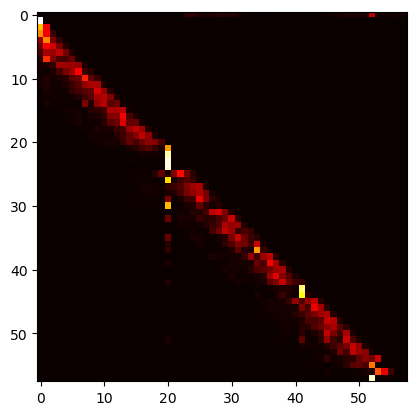

In [15]:
# visualize heatmap of attention
import matplotlib.pyplot as plt
import numpy as np
values = output["encoder_attentions"][0][0][0].detach().numpy()
plt.imshow(values, cmap='hot', interpolation='nearest')
plt.show()

In [1]:
import pandas as pd
from rdkit import Chem

df = pd.read_csv('/home/acf15718oa/ReactionT5_neword/data/demo_reaction_data.csv')
df

,Unnamed: 0,id,REACTANT,PRODUCT,REAGENT,SOLVENT,CATALYST,YIELD
0,0,ord-c2af606677024e008e8fb05d402e9b3b,B1C2CCCC1CCC2.C=CC1CCN(C(=O)OC(C)(C)C)C1.ClCCl...,CC(C)(C)OC(=O)N1CCC(CCc2ccc3c(c2)OC(F)(F)O3)C1,Cl[Pd]Cl.[Fe+2].c1ccc(P(c2ccccc2)[c-]2cccc2)cc...,CN(C)C=O.O.O,Cl[Pd]Cl.[Fe+2].c1ccc(P(c2ccccc2)[c-]2cccc2)cc...,0.98
1,1,ord-96c71ebfff6c4ee8bb6a5aa2960c2ba3,Brc1cncc(I)c1.C#C[Si](C)(C)C,C[Si](C)(C)C#Cc1cncc(Br)c1,Cl[Pd](Cl)([P](c1ccccc1)(c1ccccc1)c1ccccc1)[P]...,CC#N.CCN(CC)CC,Cl[Pd](Cl)([P](c1ccccc1)(c1ccccc1)c1ccccc1)[P]...,0.99
2,2,ord-6e64400b2c7a4e9a8789b9e79cfcee25,Brc1ccc(-c2nc3ccccc3o2)nc1.CC1(C)OB(c2ccc(-c3c...,c1ccc(N(c2ccccc2)c2ccc(-c3ccc(-c4ccc(-c5nc6ccc...,c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2...,C1CCOC1.CC(C)=O.ClCCl.ClCCl,c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2...,0.77
3,3,ord-b77f09a6bfcb449c8320355cea96234a,Brc1ccc2ncccc2c1.Cc1ccc2c(cnn2C2CCCCO2)c1[B-](...,Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1,C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.CC(=O)[O-].CC(=O...,C1CCOC1.CC#N.CCc1cc(CC)cc(CC)c1.CCc1cccc(CC)c1...,C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.CC(=O)[O-].CC(=O...,0.13
4,4,ord-a78f05158222489f8516262e16c2e1d4,CC=CCOc1ccc(Cl)cc1I.CCCC[NH3+].O=C([O-])[O-].O...,CCc1coc2ccc(Cl)cc12,CC(=O)[O-].CC(=O)[O-].[Pd+2],CN(C)C=O,CC(=O)[O-].CC(=O)[O-].[Pd+2],0.60
...,...,...,...,...,...,...,...,...
107,107,ord-3cac9ca75bf34bae9d8605b4ace7a1c5,CC(C)(C)[O-].CC(C)N1CCNCC1.COc1cc(Br)cc(C2OCCC...,COc1cc(C=O)cc(N2CCN(C(C)C)CC2)c1,O=C(/C=C/c1ccccc1)/C=C/c1ccccc1.O=C(/C=C/c1ccc...,Cc1ccccc1,O=C(/C=C/c1ccccc1)/C=C/c1ccccc1.O=C(/C=C/c1ccc...,0.27
108,108,ord-b146ca9198c348cca63bcac068757137,COCOc1cc(OC)ccc1I.O=C1CCC(=O)N1Br,COCOc1cc(OC)c(Br)cc1I,Cc1c(C(C)(C)C)cc(O)cc1C(C)(C)C,CC#N,Cc1c(C(C)(C)C)cc(O)cc1C(C)(C)C,0.76
109,109,ord-50c61014210e4234b91331351ce47941,CCOCOCC.OCC(Cl)CCl,CCOCOCC(Cl)CCl,Cc1ccccc1S(=O)(=O)O.O,NaN,Cc1ccccc1S(=O)(=O)O.O,0.69
110,110,ord-f252f2d4246c4459989daae36b6c6aae,CC1(C)OB(c2ccnc(N3CCOCC3)c2)OC1(C)C.Cc1nc(NC(=...,Cc1nc(NC(=O)NC(=O)C(C)C)ccc1Oc1ccnc(-c2ccnc(N3...,c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2...,C1COCCO1.O,c1ccc([P](c2ccccc2)(c2ccccc2)[Pd]([P](c2ccccc2...,0.28


In [21]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = df['REACTANT'].values[3]
print(smiles)
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

img.save("/home/acf15718oa/ReactionT5_neword/data/REACTANT.png")

Brc1ccc2ncccc2c1.Cc1ccc2c(cnn2C2CCCCO2)c1[B-](F)(F)F.[K+]


In [26]:
"Brc1ccc2ncccc2c1.Cc1ccc2c(cnn2C2CCCCO2)c1[B-](F)(F)F.[K+]"[:20]

'Brc1ccc2ncccc2c1.Cc1'

In [22]:
smiles = df['REAGENT'].values[3]
print(smiles)
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

img.save("/home/acf15718oa/ReactionT5_neword/data/REAGENT.png")

C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.CC(=O)[O-].CC(=O)[O-].CCN(CC)CC.[Pd+2]


In [29]:
"C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.CC(=O)[O-].CC(=O)[O-].CCN(CC)CC.[Pd+2]"[:20]

'C1CCC(P(C2CCCCC2)C2C'

In [23]:
smiles = df['SOLVENT'].values[3]
print(smiles)
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

img.save("/home/acf15718oa/ReactionT5_neword/data/SOLVENT.png")

C1CCOC1.CC#N.CCc1cc(CC)cc(CC)c1.CCc1cccc(CC)c1.CN(C)C=O.Cc1ccccc1.O


In [24]:
smiles = df['CATALYST'].values[3]
print(smiles)
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

img.save("/home/acf15718oa/ReactionT5_neword/data/CATALYST.png")

C1CCC(P(C2CCCCC2)C2CCCCC2)CC1.CC(=O)[O-].CC(=O)[O-].[Pd+2]


In [25]:
smiles = df['PRODUCT'].values[3]
print(smiles)
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

img.save("/home/acf15718oa/ReactionT5_neword/data/PRODUCT.png")

Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1


In [30]:
"Cc1ccc2c(cnn2C2CCCCO2)c1-c1ccc2ncccc2c1"[:20]

'Cc1ccc2c(cnn2C2CCCCO'

In [31]:
from datasets import load_dataset

ds = load_dataset("sagawa/ZINC-canonicalized")
ds

Generating train split:   0%|          | 0/20693269 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2299253 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['smiles'],
        num_rows: 20693269
    })
    validation: Dataset({
        features: ['smiles'],
        num_rows: 2299253
    })
})

In [39]:
zinc_count = {}
smiles = ds["train"]["smiles"] + ds["validation"]["smiles"]
for text in smiles:
    for character in list(text):
        if character in zinc_count:
            zinc_count[character] += 1
        else:
            zinc_count[character] = 1


In [52]:
np.array(list(zinc_count.values()))/sum(zinc_count.values())*100

array([1.13821683e-01, 8.50940276e+00, 8.50940276e+00, 8.91711180e-01,
       5.24240039e-01, 3.88250605e-07, 6.57265567e-02, 6.45314709e+00,
       4.31845218e+00, 1.60628079e+00, 3.08368043e-01, 2.71352231e-02,
       1.12980926e-03, 3.41660533e-05, 2.13537833e-06, 1.94125303e-07,
       2.80630643e+00, 3.04223022e+00, 1.00056452e-01, 1.96720431e+01,
       7.12952157e-01, 2.99563422e+00, 6.41021162e-03, 3.85494007e+00,
       4.47262610e+00, 1.16475182e-06, 3.93656704e-01, 3.26798707e+00,
       1.60293145e-02, 3.26798707e+00, 2.02634615e+01, 3.47202422e-01,
       2.71320695e+00, 2.74263042e-01, 4.46488196e-06, 1.00056452e-01,
       3.64089867e-01])

<BarContainer object of 37 artists>

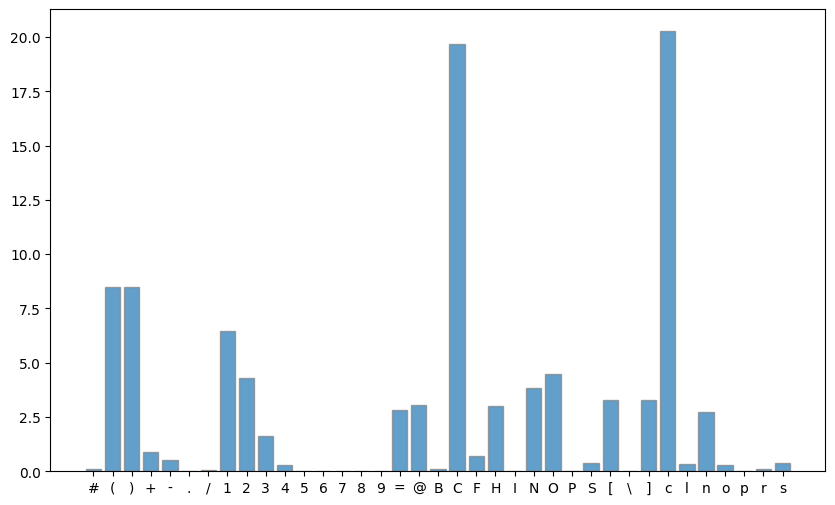

In [62]:
import matplotlib.pyplot as plt
import numpy as np
zinc_count = dict(sorted(zinc_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.bar(zinc_count.keys(), np.array(list(zinc_count.values()))/sum(zinc_count.values())*100, alpha=0.7, edgecolor="grey")

[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20')]

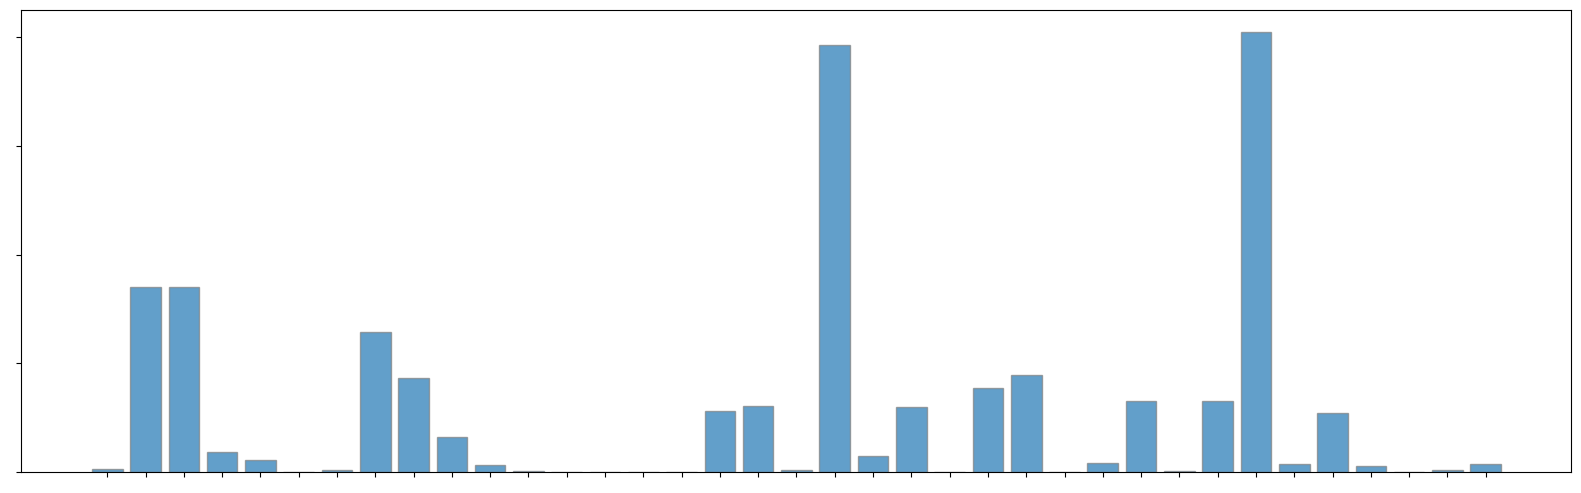

In [90]:
import matplotlib.pyplot as plt
import numpy as np
zinc_count = dict(sorted(zinc_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(zinc_count.keys(), np.array(list(zinc_count.values()))/sum(zinc_count.values())*100, alpha=0.7, edgecolor="grey")
axes.set_xticks(range(len(zinc_count)))
axes.set_xticklabels(zinc_count.keys(), alpha=0, fontsize=0)
axes.set_yticks(range(0, 22, 5))
axes.set_yticklabels(range(0, 22, 5), alpha=0, fontsize=0)

In [77]:
ord = pd.concat([pd.read_csv(f"/home/acf15718oa/ReactionT5_neword/data/all_ord_reaction_uniq_with_attr20240506_v3_{split}.csv") for split in ["train", "valid", "test"]])

In [78]:
ord

,id,CATALYST,REACTANT,REAGENT,SOLVENT,INTERNAL_STANDARD,NoData,PRODUCT,YIELD,TEMP
0,ord-b45f2eddde7844199a0384f3f9ed9b3e,NaN,C(=NC1CCCCC1)=NC1CCCCC1.CC(C)(C)OC(=O)CO/N=C(\...,NaN,CC(=O)N(C)C.CC(=O)N(C)C.O,NaN,NaN,CC(C)(C)OC(=O)CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(...,83.0,NaN
1,ord-c7e5a1f8ae464c78babc02d43cb78f73,NaN,CC(C)OC(=O)N=NC(=O)OC(C)C.CCCCC[C@H](O)c1ccc(C...,NaN,C1CCOC1,NaN,NaN,CCCCC[C@@H](OC(=O)c1ccc([N+](=O)[O-])cc1)c1ccc...,63.0,NaN
2,ord-77314c6f17694a36aebf35c12cd3211a,NaN,CC(CN1CCCC1)N1c2ccccc2Sc2ccc(C(N)=S)cc21.CCOC(...,NaN,NaN,NaN,NaN,CC(CN1CCCC1)N1c2ccccc2Sc2ccc(C3=NC4CCCCC4N3)cc21,NaN,NaN
3,ord-60c8bc2894e14e68bad70a37f7315f8b,NaN,CC(C)(C)OC(=O)N(C(=O)[C@@H]1C[C@H](F)CN1)C(C)(...,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@@H]1C[C@H](F)CN1C(=O)[C@@H](O...,NaN,NaN
4,ord-164f0514fbfe45bf82e47f63642b75a0,NaN,CCC=CCCc1cc(Cl)cc(C(=O)OC)c1O,NaN,O=C(O)C(F)(F)F,NaN,NaN,COC(=O)c1cc(Cl)cc2c1O[C@@H]1CCCC[C@@H]21,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...
227434,ord-2889af2d79d44981b3deff1cb0e380a9,NaN,CC(C)(C)OC(=O)Nc1cncc(C(=O)N2CCC(c3cccc(CN(C(=...,NaN,NaN,NaN,NaN,CC(C)(C)OC(=O)N(Cc1cccc(C2CCN(C(=O)c3cncc(N(Cc...,NaN,NaN
227435,ord-198a46ae7f114510a733a320a69456d1,NaN,B.CSC.O=C(O)COCCc1ccc(Br)cc1,NaN,C1CCOC1,NaN,NaN,OCCOCCc1ccc(Br)cc1,81.0,NaN
227436,ord-8e5916d7de784c3580826d326212eea6,NaN,C#CCN1CCCC1.COc1ccc(Nc2ncc3c(n2)-c2ccc(I)cc2NC...,NaN,NaN,NaN,NaN,COc1ccc(Nc2ncc3c(n2)-c2ccc(C#CCN4CCCC4)cc2NC(=...,NaN,NaN
227437,ord-66932398dee34023ace480a221417349,NaN,C1CCOC1.CO.Cc1cn(-c2ccc([N+](=O)[O-])cc2F)cn1....,NaN,NaN,NaN,NaN,Cc1cn(-c2ccc(N)cc2F)cn1,NaN,NaN


In [85]:
ord_count = {}
smiles = ord["CATALYST"].to_list() + ord["REACTANT"].to_list() + ord["REACTANT"].to_list() + ord["REAGENT"].to_list() + ord["SOLVENT"].to_list() + ord["PRODUCT"].to_list()
for text in smiles:
    if isinstance(text, str):
        for character in list(text):
            if character in ord_count:
                ord_count[character] += 1
            else:
                ord_count[character] = 1


<BarContainer object of 69 artists>

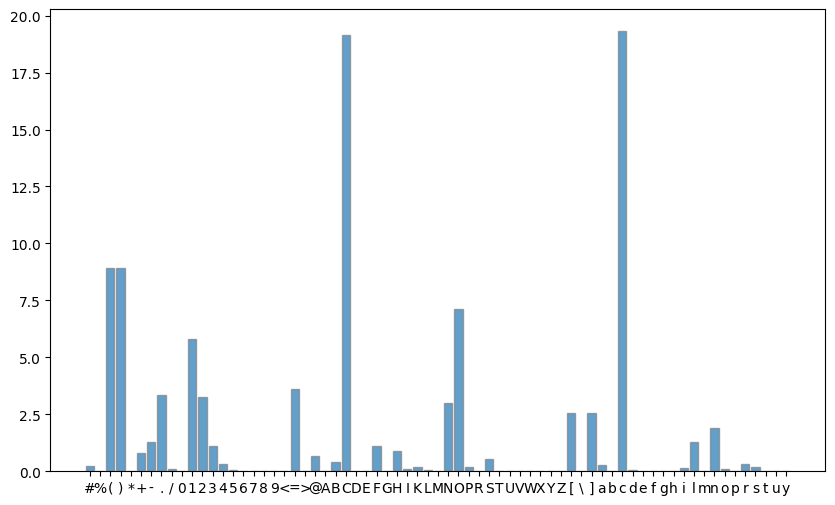

In [86]:
import matplotlib.pyplot as plt
import numpy as np
ord_count = dict(sorted(ord_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.bar(ord_count.keys(), np.array(list(ord_count.values()))/sum(ord_count.values())*100, alpha=0.7, edgecolor="grey")

[Text(0, 0, '0'),
 Text(0, 5, '5'),
 Text(0, 10, '10'),
 Text(0, 15, '15'),
 Text(0, 20, '20')]

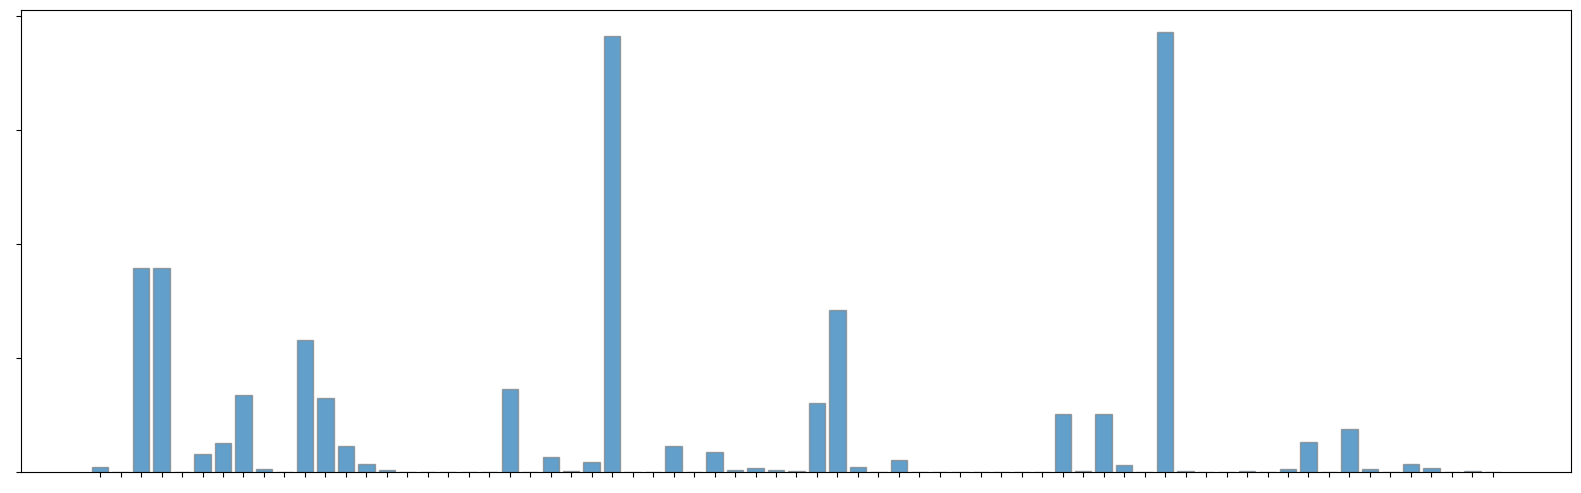

In [91]:
import matplotlib.pyplot as plt
import numpy as np
ord_count = dict(sorted(ord_count.items()))
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plt.bar(ord_count.keys(), np.array(list(ord_count.values()))/sum(ord_count.values())*100, alpha=0.7, edgecolor="grey")
axes.set_xticks(range(len(ord_count)))
axes.set_xticklabels(ord_count.keys(), alpha=0, fontsize=0)
axes.set_yticks(range(0, 22, 5))
axes.set_yticklabels(range(0, 22, 5), alpha=0, fontsize=0)